In [39]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas
from matplotlib.colors import ListedColormap
import sys
import gc
import pylab
from collections import Counter

In [40]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

In [59]:
def dates(s):
    year = s[:2]
    month = s[2:4]
    return "20" + year + "-" + month + "-" + "01"
same_city = {"DABOLIM":"GOA","Jharsuguda":"JHARSUGUDA","KADAPA":"CUDDAPAH","PONDICHERRY":"PUDUCHERRY", "COCHIN":"KOCHI"
}

In [60]:

# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

max_weight = 0
min_weight = 10000000000
graphs = []

passengers1 = []  # records number of total passengers(month wise)
lbls = []
lbls2 = []
tt = 0


monthstogether = 1
passengers = []    # records number of total passengens for given combined months


while (tt < len(excel_list)):
    i = excel_list[tt]
    lbls2.append(dates(i))
    path = "Raw_Data/"+i
    lbls.append(i[:-4])
    cities = {}
    G = nx.DiGraph()
    xmonths = Counter()
    
    for jj in range(tt,min(tt+monthstogether,len(excel_list))):
        
        path = path = "Raw_Data/" + excel_list[jj]
        excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
        

        
        for i in range(1,len(excel)+1):
            city1 = excel["city1"][i]
            city2 = excel["city2"][i]
            
            
            if city1 in same_city:
                city1 = same_city[city1]
        
            if city2 in same_city:
                city2 = same_city[city2]
            cities[city1] = (coordinates["Longitude"][city1],coordinates["Latitude"][city1])
            cities[city2] = (coordinates["Longitude"][city2],coordinates["Latitude"][city2])
            
            citypair1 = (city1,city2)
            citypair2 = (city2,city1)
            
            xmonths[citypair1] += excel["to"][i]
            xmonths[citypair2] += excel["from"][i]

            if xmonths[citypair2] == 0:
                xmonths.pop(citypair2)
            if xmonths[citypair1] == 0:
                xmonths.pop(citypair1) 
        passengers1.append(sum(excel["to"]) + sum(excel["from"]))
            
            
    for i in cities:
        G.add_node(i, pos= cities[i])


    print(path)
    for jj in xmonths:
        G.add_edge(jj[0],jj[1],weight=xmonths[jj])
        max_weight = max(max_weight,xmonths[jj])
        min_weight = min(min_weight, xmonths[jj])
    print(excel)
    graphs.append(G)
    passengers.append(sum(list(xmonths.values())))
    tt += monthstogether

graphslen = len(graphs)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[119 rows x 2 columns]
Raw_Data/1505.csv
             city1       city2       to     from
SNo                                             
1    AGATTI ISLAND       KOCHI    482.0    787.0
2        AHMEDABAD   BENGALURU  15846.0  13112.0
3        AHMEDABAD      BHOPAL   1020.0    720.0
4        AHMEDABAD     CHENNAI  16090.0  14762.0
5        AHMEDABAD  COIMBATORE    946.0   1204.0
..             ...         ...      ...      ...
280       VADODARA   BENGALURU    513.0      0.0
281       VADODARA     CHENNAI   1106.0   1012.0
282       VAD

Raw_Data/1611.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI    723   1215
2         AGARTALA  VISAKHAPATNAM     63      0
3    AGATTI ISLAND          KOCHI    777    828
4             AGRA          DELHI      0     28
5             AGRA      KHAJURAHO    313      0
..             ...            ...    ...    ...
315       VADODARA      HYDERABAD    322    383
316       VADODARA        KOLKATA    745      0
317       VADODARA        LUCKNOW    125    101
318       VADODARA         MUMBAI  23436  22643
319     VIJAYAWADA  VISAKHAPATNAM   1697   1743

[319 rows x 4 columns]
Raw_Data/1612.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI    967    996
2         AGARTALA  VISAKHAPATNAM     69      0
3    AGATTI ISLAND          KOCHI   1020   1128
4             AGRA          DELHI      0     41
5             AGRA      KHAJ

Raw_Data/1804.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   4578   2643
2         AGARTALA           PUNE    227      0
3         AGARTALA  VISAKHAPATNAM    182      3
4    AGATTI ISLAND          KOCHI   1270   1451
5             AGRA          DELHI      0     43
..             ...            ...    ...    ...
432       VADODARA      HYDERABAD    303    378
433       VADODARA          KOCHI     59      0
434       VADODARA      MANGALORE     66      0
435       VADODARA         MUMBAI  25727  23227
436     VIJAYAWADA  VISAKHAPATNAM   2871   3369

[436 rows x 4 columns]
Raw_Data/1805.csv
          city1          city2     to   from
SNo                                         
1       ADAMPUR          DELHI   2258   2190
2      AGARTALA        CHENNAI   4971   2452
3      AGARTALA           PUNE    165      0
4      AGARTALA       SHILLONG     43     27
5      AGARTALA  VISAKHAPATNAM    198      2
.

Raw_Data/1907.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  2048  2088
2      AGARTALA       BAGDOGRA     0     9
3      AGARTALA      BENGALURU  3205  3313
4      AGARTALA        CHENNAI  2266  1555
5      AGARTALA     COIMBATORE     0    18
..          ...            ...   ...   ...
494    TIRUPATI     VIJAYAWADA   627   664
495    TIRUPATI  VISAKHAPATNAM   224   285
496  TRIVANDRUM       VARANASI     1     0
497     UDAIPUR  VISAKHAPATNAM     2     0
498  VIJAYAWADA  VISAKHAPATNAM  1374  1393

[498 rows x 4 columns]
Raw_Data/1908.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  2343  2296
2      AGARTALA       BAGDOGRA     0   186
3      AGARTALA      BENGALURU  3710  3754
4      AGARTALA        CHENNAI  3401  2668
5      AGARTALA     COIMBATORE     0    13
..          ...            ...   ...   ...
482      RAIPUR  VISAKHAPATNAM   619 

Raw_Data/2012.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI   939   863
2       ADAMPUR         KANDLA     0     4
3       ADAMPUR         MUMBAI   912   558
4      AGARTALA      BENGALURU  4214  3504
5      AGARTALA        CHENNAI   961  1138
..          ...            ...   ...   ...
464      RAIPUR  VISAKHAPATNAM   369     0
465    SRINAGAR          SURAT    69     0
466    TIRUPATI     VIJAYAWADA   770   858
467    TIRUPATI  VISAKHAPATNAM  1490  1699
468  VIJAYAWADA  VISAKHAPATNAM  1621  1364

[468 rows x 4 columns]


In [61]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

AGATTI ISLAND
KOCHI
AHMEDABAD
BENGALURU
BHOPAL
CHENNAI
COIMBATORE
DELHI
DIBRUGARH
GOA
GUWAHATI
HYDERABAD
IMPHAL
INDORE
JAIPUR
KOLKATA
LUCKNOW
MUMBAI
NAGPUR
PUNE
AIZAWL
AMRITSAR
SRINAGAR
BAGDOGRA
BELGAUM
JABALPUR
AGARTALA
CHANDIGARH
DEHRA DUN
HUBLI
JODHPUR
JORHAT
KOZHIKODE
MANGALORE
PATNA
PUDUCHERRY
RAIPUR
RAJAHMUNDRY
RAJKOT
RANCHI
TRIVANDRUM
VARANASI
VIJAYAWADA
VISAKHAPATNAM
BHAVNAGAR
BHUBANESWAR
PORT BLAIR
BHUJ
TIRUCHIRAPALLY
TUTICORIN
ALLAHABAD
AURANGABAD
DHARAMSALA
DIMAPUR
GAYA
GWALIOR
JAMMU
KHAJURAHO
KULLU
LEH
PANTNAGAR
SURAT
TIRUPATI
UDAIPUR
DIU
PORBANDAR
LILABARI
SILCHAR
MADURAI
DURGAPUR
SHILLONG
JAMNAGAR
TEZPUR
VADODARA

CUDDAPAH

AGRA


MYSORE
GORAKHPUR















BHATINDA
KANPUR




SIMLA
NANDED



KANDLA


BIKANER
LUDHIANA

JAISALMER
SHIRDI
VIDYANAGAR


JALGAON
NASIK


MUNDRA

SALEM

PATHANKOT
KOLHAPUR

ADAMPUR
PASIGHAT

JAGDALPUR




AJMER
GANGTOK


KANNUR

PITHORAGARH
PAKYONG


JHARSUGUDA







GHAZIABAD

KALABURAGI, KARNATAKA



BIDAR AIRPORT, KARNATAKA









DARBH

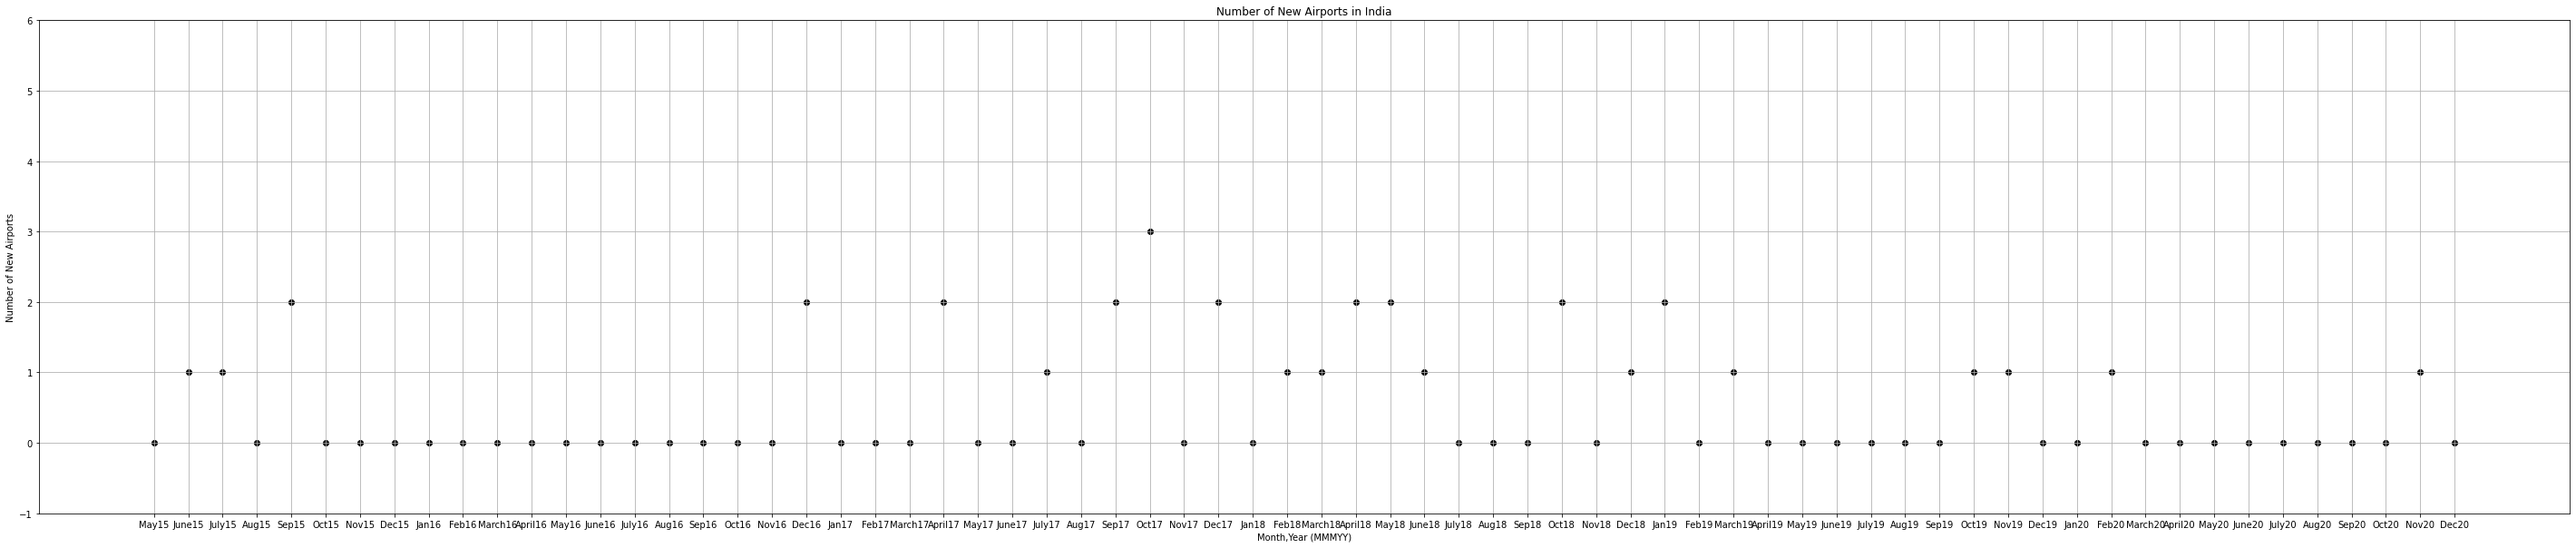

In [71]:
nnodes = []
airpor = {} 
new_airports = []
for i in range(len(graphs)):
    airports_new = []
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
            print(j)
            airports_new.append(j)
    print()
    new_airports.append(airports_new)
    nnodes.append(temp)
nnodes[0] = 0
plt.scatter(lbls1, nnodes, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/new/newnodes')
plt.show()
plt.clf()
plt.close()

In [63]:
length = max(map(len, new_airports))
y=np.array([xi+[None]*(length-len(xi)) for xi in new_airports])
pd.DataFrame(y)[:10]

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,AGATTI ISLAND,KOCHI,AHMEDABAD,BENGALURU,BHOPAL,CHENNAI,COIMBATORE,DELHI,DIBRUGARH,GOA,...,DIU,PORBANDAR,LILABARI,SILCHAR,MADURAI,DURGAPUR,SHILLONG,JAMNAGAR,TEZPUR,VADODARA
1,CUDDAPAH,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,AGRA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,MYSORE,GORAKHPUR,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [64]:
# AGRA
edges = {}
for i in range(len(graphs)):
    in_e = graphs[i].in_edges("AGRA")
    out_e = graphs[i].out_edges("AGRA")
    edges[lbls1[i]] = []
    for j in in_e:
        if(j[0] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[0])
    for j in out_e:
        if(j[1] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[1])
print(edges)
    

{'May15': [], 'June15': [], 'July15': ['VARANASI', 'KHAJURAHO'], 'Aug15': ['DELHI', 'VARANASI'], 'Sep15': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Oct15': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Nov15': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Dec15': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Jan16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Feb16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'March16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'April16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'May16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'June16': [], 'July16': [], 'Aug16': [], 'Sep16': [], 'Oct16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Nov16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Dec16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Jan17': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Feb17': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'March17': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'April17': [], 'May17': [], 'June17': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'July17': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Aug17': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Se

In [65]:
# GORAKHPUR
edges = {}
for i in range(len(graphs)):
    in_e = graphs[i].in_edges("GORAKHPUR")
    out_e = graphs[i].out_edges("GORAKHPUR")
    edges[lbls1[i]] = []
    for j in in_e:
        if(j[0] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[0])
    for j in out_e:
        if(j[1] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[1])
print(edges)

{'May15': [], 'June15': [], 'July15': [], 'Aug15': [], 'Sep15': ['DELHI'], 'Oct15': ['DELHI'], 'Nov15': ['DELHI'], 'Dec15': [], 'Jan16': ['DELHI'], 'Feb16': ['DELHI'], 'March16': ['DELHI'], 'April16': ['DELHI'], 'May16': ['DELHI'], 'June16': ['DELHI'], 'July16': ['DELHI'], 'Aug16': ['DELHI'], 'Sep16': ['DELHI'], 'Oct16': ['DELHI', 'KOLKATA'], 'Nov16': ['DELHI', 'KOLKATA'], 'Dec16': [], 'Jan17': [], 'Feb17': ['DELHI', 'KOLKATA'], 'March17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'April17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'May17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'June17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'July17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'Aug17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'Sep17': ['KOLKATA', 'DELHI', 'GUWAHATI'], 'Oct17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'Nov17': ['DELHI'], 'Dec17': [], 'Jan18': [], 'Feb18': ['DELHI'], 'March18': ['DELHI'], 'April18': ['DELHI', 'SURAT'], 'May18': ['DELHI', 'SURAT'], 'June18': ['DELHI', 'SURAT'], 'July18': ['DELHI', 'SURAT'], 'Aug18': 

In [76]:
# MYSORE
edges = {}
for i in range(len(graphs)):
    in_e = graphs[i].in_edges("BHATINDA")
    out_e = graphs[i].out_edges("BHATINDA")
    edges[lbls1[i]] = []
    for j in in_e:
        if(j[0] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[0])
    for j in out_e:
        if(j[1] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[1])
print(edges)

{'May15': [], 'June15': [], 'July15': [], 'Aug15': [], 'Sep15': [], 'Oct15': [], 'Nov15': [], 'Dec15': [], 'Jan16': [], 'Feb16': [], 'March16': [], 'April16': [], 'May16': [], 'June16': [], 'July16': [], 'Aug16': [], 'Sep16': [], 'Oct16': [], 'Nov16': [], 'Dec16': ['DELHI'], 'Jan17': ['DELHI'], 'Feb17': ['DELHI'], 'March17': ['DELHI'], 'April17': ['DELHI'], 'May17': ['DELHI'], 'June17': ['DELHI'], 'July17': ['DELHI'], 'Aug17': ['DELHI'], 'Sep17': ['DELHI'], 'Oct17': ['DELHI'], 'Nov17': ['DELHI'], 'Dec17': ['DELHI'], 'Jan18': ['DELHI'], 'Feb18': ['DELHI', 'JAMMU'], 'March18': ['DELHI', 'JAMMU'], 'April18': ['DELHI', 'JAMMU'], 'May18': ['DELHI', 'JAMMU'], 'June18': ['DELHI', 'JAMMU'], 'July18': ['DELHI', 'JAMMU'], 'Aug18': ['DELHI', 'JAMMU'], 'Sep18': ['DELHI', 'JAMMU'], 'Oct18': ['DELHI', 'JAMMU'], 'Nov18': ['DELHI', 'JAMMU'], 'Dec18': ['DELHI', 'JAMMU'], 'Jan19': ['DELHI', 'JAMMU'], 'Feb19': ['DELHI', 'JAMMU'], 'March19': ['DELHI', 'JAMMU'], 'April19': ['DELHI', 'JAMMU'], 'May19': ['DE

In [75]:
# Cuddapah
edges = {}
for i in range(len(graphs)):
    in_e = graphs[i].in_edges("CUDDAPAH")
    out_e = graphs[i].out_edges("CUDDAPAH")
    edges[lbls1[i]] = []
    for j in in_e:
        if(j[0] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[0])
    for j in out_e:
        if(j[1] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[1])
print(edges)

{'May15': [], 'June15': ['BENGALURU'], 'July15': ['BENGALURU'], 'Aug15': ['BENGALURU'], 'Sep15': [], 'Oct15': [], 'Nov15': [], 'Dec15': [], 'Jan16': [], 'Feb16': [], 'March16': [], 'April16': ['HYDERABAD', 'TIRUPATI'], 'May16': ['HYDERABAD', 'VIJAYAWADA', 'TIRUPATI'], 'June16': ['CHENNAI', 'HYDERABAD', 'VIJAYAWADA', 'TIRUPATI'], 'July16': ['CHENNAI', 'HYDERABAD', 'VIJAYAWADA', 'TIRUPATI'], 'Aug16': ['HYDERABAD', 'VIJAYAWADA', 'TIRUPATI'], 'Sep16': ['HYDERABAD', 'VIJAYAWADA', 'TIRUPATI'], 'Oct16': ['VIJAYAWADA'], 'Nov16': ['VIJAYAWADA'], 'Dec16': ['VIJAYAWADA'], 'Jan17': [], 'Feb17': [], 'March17': [], 'April17': ['HYDERABAD'], 'May17': ['HYDERABAD'], 'June17': ['HYDERABAD'], 'July17': ['HYDERABAD'], 'Aug17': ['HYDERABAD'], 'Sep17': ['HYDERABAD'], 'Oct17': ['HYDERABAD'], 'Nov17': ['CHENNAI', 'HYDERABAD'], 'Dec17': ['CHENNAI', 'HYDERABAD'], 'Jan18': ['HYDERABAD', 'CHENNAI'], 'Feb18': ['CHENNAI', 'HYDERABAD'], 'March18': ['HYDERABAD', 'CHENNAI', 'VIJAYAWADA'], 'April18': ['CHENNAI', 'HYDE

In [82]:
edges = {}
for i in range(len(graphs)):
    in_e = graphs[i].in_edges("DELHI")
    out_e = graphs[i].out_edges("DELHI")
    edges[lbls1[i]] = []
    for j in in_e:
        if(j[0] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[0])
    for j in out_e:
        if(j[1] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[1])
# print(edges)
for i in edges:
    print(len(edges[i]))

54
54
54
55
56
57
56
56
57
57
58
58
58
57
56
56
56
57
57
58
58
60
61
60
60
62
62
61
63
65
65
64
64
66
66
68
69
69
69
69
69
71
72
73
72
72
72
71
71
70
69
70
70
72
71
71
71
71
70
0
51
54
58
59
60
66
69
71


In [89]:
edges = {}
for i in range(len(graphs)):
    in_e = graphs[i].in_edges("AMRITSAR")
    out_e = graphs[i].out_edges("AMRITSAR")
    edges[lbls1[i]] = []
    for j in in_e:
        if(j[0] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[0])
    for j in out_e:
        if(j[1] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[1])
print(edges)
for i in edges:
    print(len(edges[i]))

{'May15': ['CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'June15': ['CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'July15': ['BENGALURU', 'CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'Aug15': ['BENGALURU', 'CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'Sep15': ['BENGALURU', 'CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'Oct15': ['BENGALURU', 'CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'Nov15': ['BENGALURU', 'CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'Dec15': ['BENGALURU', 'CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'Jan16': ['BENGALURU', 'CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'Feb16': ['BENGALURU', 'CHENNAI', 'DELHI', 'JAMMU', 'MUMBAI', 'SRINAGAR'], 'March16': ['BENGALURU', 'CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'April16': ['BENGALURU', 'CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'May16': ['BENGALURU', 'CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'June16': ['BENGALURU', 'CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'July16': ['BENGALURU', 'CHENNAI', 'DELHI', 'MUMBAI', 'SRINAGAR'], 'Aug16': ['BENGALU

In [92]:
edges = {}
for i in range(len(graphs)):
    in_e = graphs[i].in_edges("BARAPANI")
    out_e = graphs[i].out_edges("BARAPANI")
    edges[lbls1[i]] = []
    for j in in_e:
        if(j[0] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[0])
    for j in out_e:
        if(j[1] not in edges[lbls1[i]]):
            edges[lbls1[i]].append(j[1])
print(edges)
for i in edges:
    print(len(edges[i]))

{'May15': [], 'June15': [], 'July15': [], 'Aug15': [], 'Sep15': [], 'Oct15': [], 'Nov15': [], 'Dec15': [], 'Jan16': [], 'Feb16': [], 'March16': [], 'April16': [], 'May16': [], 'June16': [], 'July16': [], 'Aug16': [], 'Sep16': [], 'Oct16': [], 'Nov16': [], 'Dec16': [], 'Jan17': [], 'Feb17': [], 'March17': [], 'April17': [], 'May17': [], 'June17': [], 'July17': [], 'Aug17': [], 'Sep17': [], 'Oct17': [], 'Nov17': [], 'Dec17': [], 'Jan18': [], 'Feb18': [], 'March18': [], 'April18': [], 'May18': [], 'June18': [], 'July18': [], 'Aug18': [], 'Sep18': [], 'Oct18': [], 'Nov18': [], 'Dec18': [], 'Jan19': [], 'Feb19': [], 'March19': [], 'April19': [], 'May19': [], 'June19': [], 'July19': [], 'Aug19': [], 'Sep19': [], 'Oct19': [], 'Nov19': [], 'Dec19': [], 'Jan20': [], 'Feb20': [], 'March20': [], 'April20': [], 'May20': [], 'June20': [], 'July20': [], 'Aug20': [], 'Sep20': [], 'Oct20': [], 'Nov20': [], 'Dec20': []}
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0